## Sequential API를 활용한 Modeling  
  * tf.keras를 활용한 기본적인 모델링 방법  
  * 가장 간단한 모델링 방법이며, 입문자에게 적합한 방식  
  * 하나의 입력, 하나의 출력을 가짐


In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__) # Tensorflow 2.1 이상 사용을 권장

2.3.0


## Fully-Connected Layer (Dense Layer) 복습

In [ ]:
# dataset 구성 : MNIST 데이터셋

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 구성

model = keras.Sequential() # Sequential을 먼저 선언
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28))
#     keras.layers.Dense(128, activation='relu')
#     keras.layers.Dropout(0.3)
#     keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Q. Input_shape를 무조건 선언해줘야 하나요?

생략해도 문제가 없지만, model.summary()를 통해 파라미터 개수를 개산하려면 input_shape가 필요합니다.

In [ ]:
# 모델 구성

test_model = keras.Sequential() # Sequential을 먼저 선언
test_model.add(keras.layers.Flatten())
test_model.add(keras.layers.Dense(128, activation='relu'))
test_model.add(keras.layers.Dropout(0.3))
test_model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
test_model.summary()

ValueError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3183 - accuracy: 0.9077
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1607 - accuracy: 0.9523
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9612
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9673
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0949 - accuracy: 0.9707
313/313 - 0s - loss: 0.0816 - accuracy: 0.9752


[0.08160886913537979, 0.9751999974250793]

## Functional API  
* 다중 입력, 다중 출력
* 데이터가 하나의 흐름만으로 흐르지 않는 모델

In [ ]:
inputs = keras.Input(shape=(28,28))  # Input을 선언해 줍니다.

x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

In [ ]:
# model 생성

model = keras.Model(
    inputs=inputs,
    outputs=predictions
)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습

model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3225 - accuracy: 0.9074
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1627 - accuracy: 0.9515
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9624
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9678
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0921 - accuracy: 0.9717


In [ ]:
# 모델 성능 테스트

model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0760 - accuracy: 0.9773


[0.07598106563091278, 0.9772999882698059]

## Subclassing
* Functional API 보다 더 자유로운 모델 구성 가능
* 개인이 forward pass를 정의하여 완벽하게 커스텀된 모델을 구성
* Pytorch의 모델 구성 방식과 유사

In [ ]:
class MyModel(keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = keras.layers.Flatten()
    self.fc1 = keras.layers.Dense(128, activation='relu')
    self.dropout = keras.layers.Dropout(0.3)
    self.fc2 = keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.fc2(x)
    return x

In [ ]:
# 모델 객체 생성

model = MyModel()

In [ ]:
# 모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습

model.fit(x_train, y_train,
          batch_size=32,
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.9043
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1687 - accuracy: 0.9496
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1306 - accuracy: 0.9606
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9706


## 커스텀 레이어

In [ ]:
class MyLayer(keras.layers.Layer):
  def __init__(self, output_dim, **kwargs):
    super(MyLayer, self).__init__(**kwargs)
    self.output_dim = output_dim

  def build(self, input_shape):
    # 이 층에서 훈련할 가중치 변수를 만듭니다.
    self.kernel = self.add_weight(name='kernel',
                                  shape=(input_shape[1], self.output_dim),
                                  initializer='uniform',
                                  trainable=True)
    
  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

  def get_config(self):
    base_config = super(MyLayer, self).get_config()
    base_config['output_dim'] = self.output_dim
    return base_config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [ ]:
custom_model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  MyLayer(10),
  keras.layers.Activation('softmax')
])

In [ ]:
# 모델 컴파일

custom_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# 모델 학습

custom_model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4648 - accuracy: 0.8829
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2869 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2774 - accuracy: 0.9223
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2712 - accuracy: 0.9242


## Callback
  * 학습하는 동안 모델의 동작을 변경하고 확장하기 위해 전달하는 객체.
  * 직접 콜백함수를 정의할 수도 있고, tf.keras.callbacks 에 포함된 것들을 사용 가능
  * tf.keras.callbacks.ModelCheckpoint: 일정 간격으로 모델의 체크포인트를 저장합니다.
  * tf.keras.callbacks.LearningRateScheduler: 학습률(learning rate)을 동적으로 변경합니다.
  * tf.keras.callbacks.EarlyStoping: 검증 성능이 향상되지 않으면 훈련을 중지 합니다.
  * tf.keras.callbacks.TensorBoard: 텐서보드를 사용하여 모델을 모니터링 합니다.

In [ ]:
# 학습에 사용할 콜백함수 생성

callbacks = [
  # `val_loss`가 2번의 어포크에 걸쳐 향상되지 않으면 학습을 중단
  keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # `./logs` 폴더에 턴서보드 로그를 기록
  keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# 모델 학습

model.fit(x_train, y_train,
          batch_size=32, epochs=5,
          callbacks=callbacks,
          validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9861 - val_loss: 0.0751 - val_accuracy: 0.9799
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9871 - val_loss: 0.0798 - val_accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9863 - val_loss: 0.0782 - val_accuracy: 0.9804


## 모델 저장(adv)

In [ ]:
# 모델 저장

model.save('./first_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./first_model/assets


In [ ]:
# 메모리 상에 학습된 모델 삭제
del model

# 저장된 `./first_model` 경로 내 모델 로드
model = keras.models.load_model('./first_model')

In [ ]:
# tensorflow checkpoint 파일 포멧

# 가중치를 tensorflow checkpoint 파일로 저장.
model.save_weights('./weights/subclassing_model')

model.load_weights('./weights/subclassing_model')

In [ ]:
# HDF5 파일 포멧

# 가중치를 HDF5 파일로 저장.
model.save_weights('subclassing_model.h5', save_format='h5')

# 모델의 상태를 복원
model.load_weights('subclassing_model.h5')

## 모델 시각화
* Graph Network 객체인 모델은 `keras.utils.plot_model()` 함수를 이용하여 모델의 시각화 가능  
  * `Sequentail` API  
  * `Functional` API

In [ ]:
# (input: 784-dimensional vectors)
#        |
# [Dense (128 units, relu activation)]
#        |
# [Dropout (128 units, p=0.3)]
#        |
# [Dense (10 units, softmax activation)]
#        |
# (output: logits of a probability distriution over 10 classes)

In [ ]:
del model

In [ ]:
inputs = keras.Input(shape=(28,28))  # Input을 선언해 줍니다.

x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

In [ ]:
# model 생성

model = keras.Model(
    inputs=inputs,
    outputs=predictions
)

In [ ]:
inputs.shape

TensorShape([None, 28, 28])

In [ ]:
inputs.dtype

tf.float32

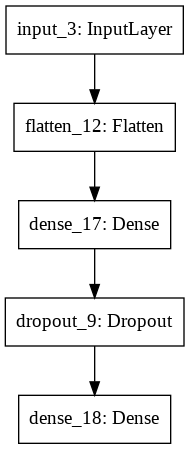

In [ ]:
# model 시각화

keras.utils.plot_model(model, 'first_model.png')

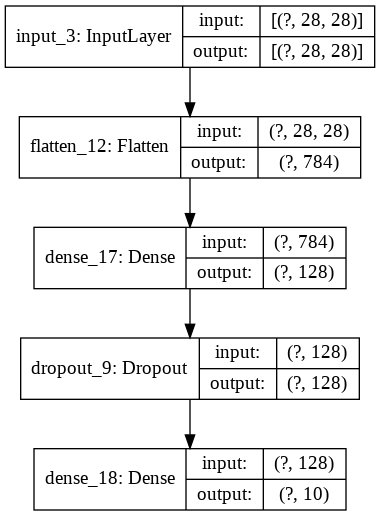

In [ ]:
# model 시각화

keras.utils.plot_model(model, 'first_model.png', show_shapes=True)